### DATA VISUALIZATION

In [1]:
#!pip install seaborn
#!pip install -U scikit-learn

In [2]:
#load python packages
import os
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.special import gamma
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#!pip install -U statsmodels # for cumulative distribution function
%matplotlib inline

### HISTOGRAM

In [3]:
url_histo = 'https://en.wikipedia.org/wiki/Histogram'


In [4]:
import webbrowser

# generate an URL

webbrowser.open(url_histo)

True

100 Data is randomly created for dataset1 and its min and max values are defined.

In [5]:
dataset1 = np.random.randn(100)
min_val1 = dataset1.min()
max_val1 = dataset1.max()
dataset1[:3]

array([0.06339161, 0.63247552, 0.97974365])

Plot un-normalized histogram of dataset1 using seaborn distplot.

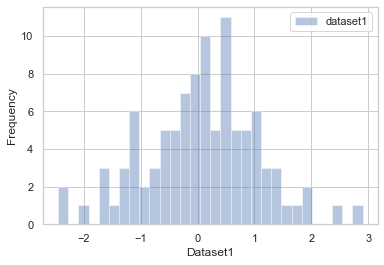

In [6]:
sns.set(style='whitegrid')
sns.distplot(dataset1, color='b', bins=30, norm_hist=False, kde=False, label='dataset1')
plt.xlabel('Dataset1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Plot normalized histogram of dataset1 using seaborn distplot.

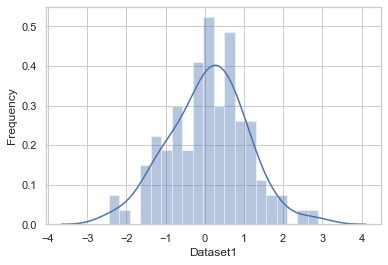

In [7]:

sns.distplot(dataset1, bins=20, color='b', norm_hist=True, kde=True)
plt.xlabel('Dataset1')
plt.ylabel('Frequency')
plt.show()

70 Data is randomly created for dataset2 and its min and max values are defined.

In [8]:
dataset2 = np.random.randn(70)
min_val2 = dataset2.min()
max_val2 = dataset2.max()

In [9]:
# To set the min and max for x-axis range
min_val = min(min_val1, min_val2)
max_val = max(max_val1, max_val2)

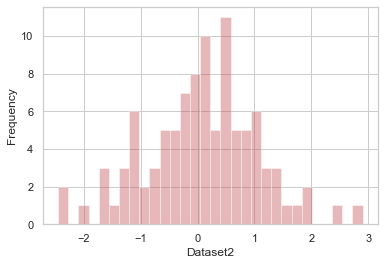

In [10]:
sns.set(style='whitegrid')
sns.distplot(dataset1, color='r', bins=30, norm_hist=False, kde=False)
plt.xlabel('Dataset2')
plt.ylabel('Frequency')
plt.show()

Compare two datasets in one figure

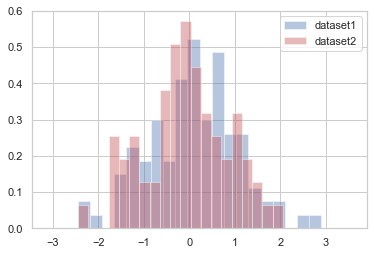

In [11]:
plt.xlim(min_val-1, max_val+1)
sns.set(style='whitegrid')
sns.distplot(dataset1, norm_hist=True, kde=False, color='b', bins=20, label='dataset1')
sns.distplot(dataset2, norm_hist=True, kde=False, color='r', bins=20, label='dataset2')
plt.legend()
plt.show()

In [12]:
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

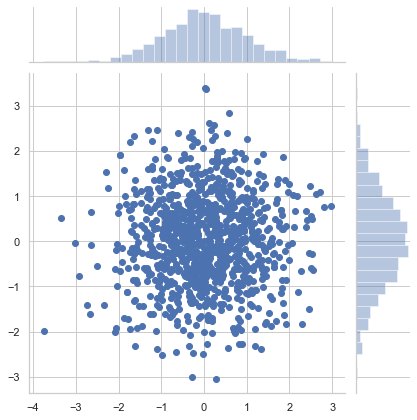

In [13]:
sns.jointplot(data1, data2)
plt.show()

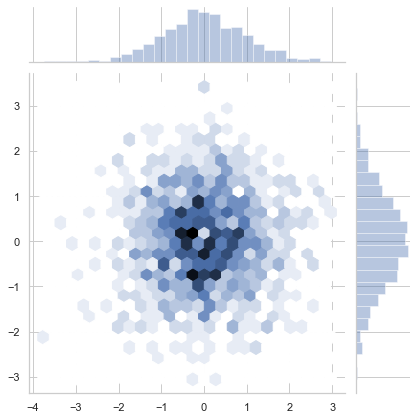

In [14]:
# The density shows thicker in the plot show below.
sns.jointplot(data1, data2, kind='hex')
plt.show()

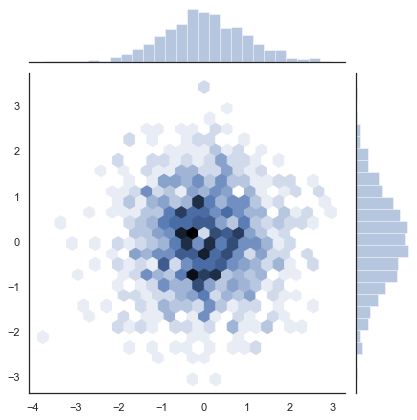

In [15]:
with sns.axes_style("white"):
    sns.jointplot(x=data1, y=data2, kind="hex", color="b")
    
plt.show()

### Bar Chart



In [16]:
cate1 = ['python', 'c++', 'java', 'Perl', 'Scala']
performance = [10,8,7,2,4]
variance = [2, 2, 3, 1, 2]

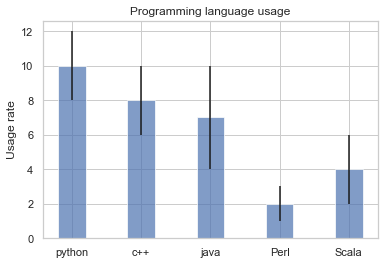

In [17]:
plt.bar(cate1, performance, width=0.4, align='center', alpha=0.7, yerr=variance)
plt.xticks(cate1)
plt.ylabel('Usage rate')
#plt.legend()
plt.title('Programming language usage')
plt.show()

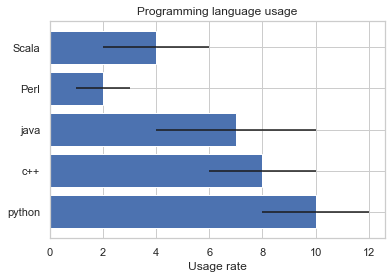

In [18]:
plt.barh(cate1, performance, xerr=variance)#, width=0.4)#, align='center', alpha=0.7)

plt.xlabel('Usage rate')
plt.title('Programming language usage')
plt.show()

### Kernel Density Estimation (kde)

In [19]:
dataset = np.random.randn(25)

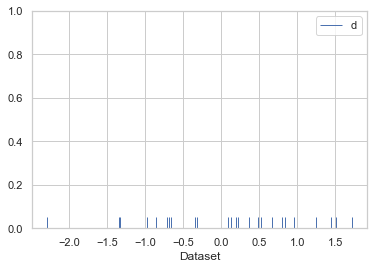

In [20]:
sns.rugplot(dataset)
plt.ylim(0, 1)
plt.xlabel('Dataset')
plt.legend('dataset')
plt.show()

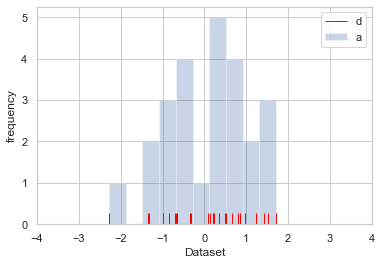

In [21]:
# alpha is for transparency
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset, color='red')
plt.xlim(-4,4)
plt.xlabel('Dataset')
plt.ylabel('frequency')
plt.legend('dataset')
plt.show()

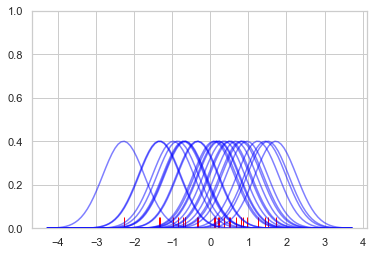

In [22]:
sns.rugplot(dataset, color='red')
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)
bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)) )**0.2
kernel_list = []

for data_point in dataset:
    # create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel*0.4
    plt.plot(x_axis, kernel, color='blue', alpha=0.5)

#sum_of_kde = np.sum(kernel_list, axis=0)
#plt.plot(x_axis, sum_of_kde, color = 'limegreen')
plt.ylim(0,1)
plt.show()

$h = (\frac{4\hat{\sigma}^{5}}{3n})^{0.2}$ 

where h is the bandwidth that minimizes the mean integrated squared error. 

In [23]:
# This url shows what the bandwidth for. 
url_kde = 'https://en.wikipedia.org/wiki/Kernel_density_estimation'
webbrowser.open(url_kde)

True

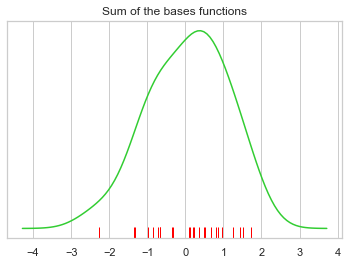

In [24]:
sum_of_kde = np.sum(kernel_list, axis=0)
plt.plot(x_axis, sum_of_kde, color = 'limegreen')
sns.rugplot(dataset, color='red')
plt.yticks([])
plt.title('Sum of the bases functions')
plt.show()

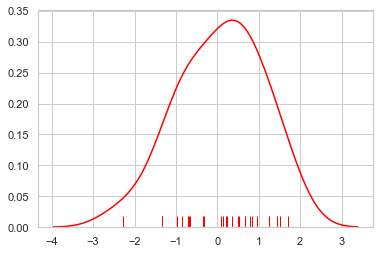

In [25]:
sns.kdeplot(dataset, color='red')
sns.rugplot(dataset, color='red')
plt.show()

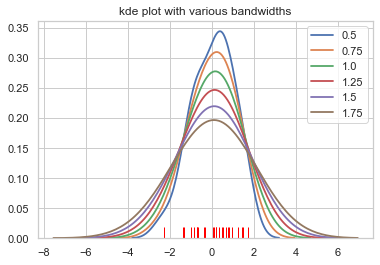

In [26]:
sns.rugplot(dataset, color = 'red')
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

plt.title('kde plot with various bandwidths')
plt.show()

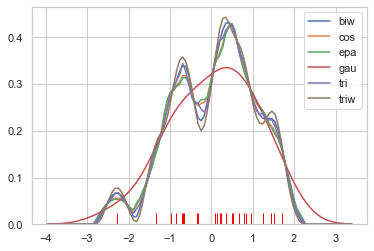

In [27]:
sns.rugplot(dataset, color = 'red')

kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for ker in kernel_options:
    sns.kdeplot(dataset, kernel=ker, label=ker, shade=False, vertical=False)
    
plt.show()

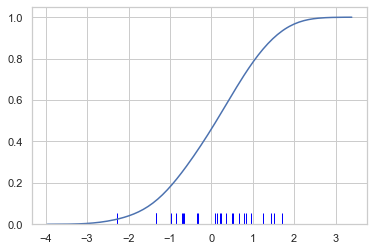

In [28]:
sns.kdeplot(dataset, cumulative=True)
sns.rugplot(dataset, color='blue')

/Users/Jae/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


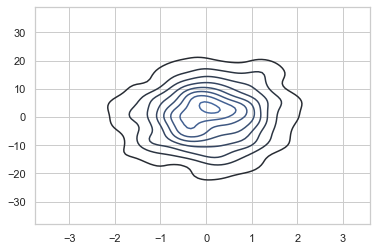

In [29]:
mean = [0,0]
cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

df = pd.DataFrame(dataset2, columns=['x', 'y'])
sns.kdeplot(df)
plt.show()

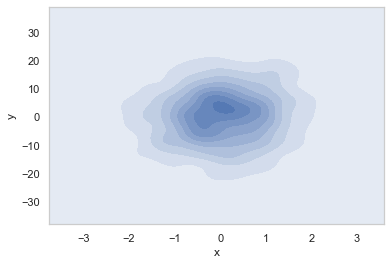

In [30]:
sns.set(style='whitegrid')
sns.kdeplot(df.x, df.y, shade=True)
plt.show()

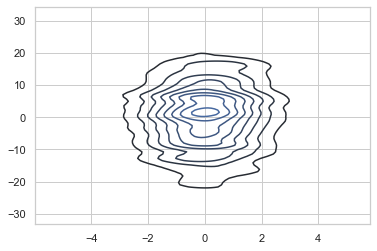

In [31]:
# with bandwidth set up.
sns.kdeplot(df, bw=1)
plt.show()

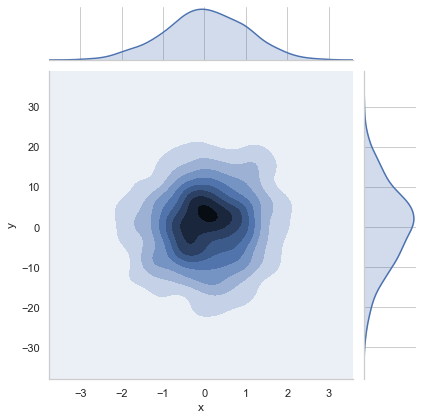

In [32]:
sns.jointplot('x','y', df, kind='kde')
plt.show()


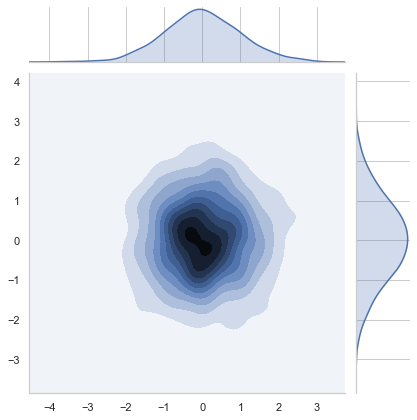

In [33]:
# This jointplot can be compared with the jointplot in the histrogram section. 
# This is set up using 'kde' kind. 
sns.jointplot(x=data1,y=data2, kind='kde')
plt.show()

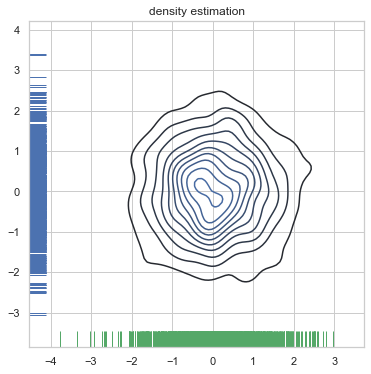

In [34]:
# The kdeplot with rugplot can be compared with jointplot above. 
f, ax = plt.subplots(figsize=(6, 6))
g = sns.kdeplot(data1, data2, ax=ax)
g = sns.rugplot(data1, color="g", ax=ax)
g = sns.rugplot(data2, color='b', vertical=True, ax=ax)
g = g.set_title('density estimation')

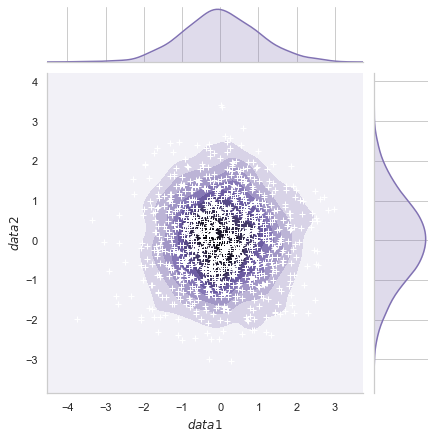

In [35]:
g = sns.jointplot(x=data1, y=data2, kind="kde", color="m", shade=True)
g = g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g = g.set_axis_labels("$data1$", "$data2$")

Histogram and kde plot can be shown together in one figure by using seaborn distplot.

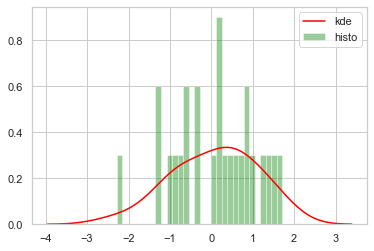

In [36]:
sns.distplot(dataset, bins=30, 
             hist_kws={'label':'histo', 'color':'green'},
             kde_kws={'label':'kde', 'color':'red'})
plt.show()

In [37]:
series1 = pd.Series(dataset, name='data')
series1.head(5)

0    0.488454
1    0.086866
2    1.437197
3    1.510884
4   -0.855527
Name: data, dtype: float64

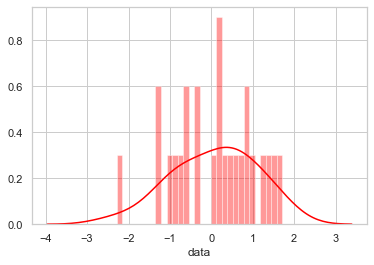

In [38]:
sns.distplot(series1, bins=30, color='red')

### BOX PLOT

In [39]:
box_data1=np.random.randn(100)
box_data2=np.random.randn(100)

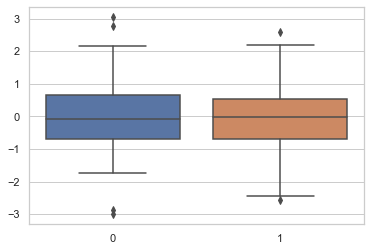

In [40]:
sns.boxplot(data=[box_data1, box_data2], orient='v')

Include outliers for both boxplot.

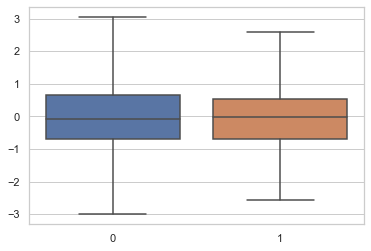

In [41]:
sns.boxplot(data=[box_data1, box_data2], whis=np.inf)

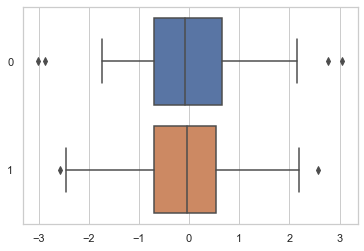

In [42]:
sns.boxplot(data=[box_data1, box_data2], orient='h')

stats.norm(loc=, scale=) is normal continuous random variable. where loc is mean and scale is standard deviation (a.k.a. Gaussian or bell curve). 

norm.pdf(x) $= f(x) = \frac{exp(-{x}^{2}/2)}{sqrt(2\pi)}$ 


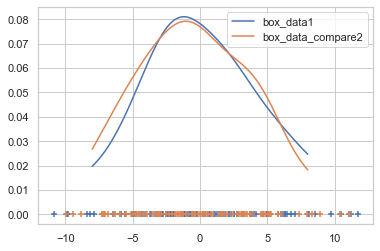

In [43]:
# Generate 100 samples of the random numbers where mean is 0 and std is 5.
box_data1=stats.norm(loc=0,scale=5).rvs(100)
density1 = stats.gaussian_kde(box_data1)
x=np.linspace(-8.0, 8.0, 200)
y=density1(x)

plt.plot(x, y)
plt.scatter(box_data1, np.zeros_like(box_data1), marker='+')
# Generate 100 samples in the same condition
# The trend will be the same, but generating the
# same samples are reproducible. 
box_data_compare2=stats.norm.rvs(loc=0,scale=5, size=100)
density2 = stats.gaussian_kde(box_data_compare2)
y2=density2(x)

plt.plot(x, y2)
plt.scatter(box_data_compare2, np.zeros_like(box_data_compare2), marker='+')

plt.legend(['box_data1','box_data_compare2'])
plt.show()

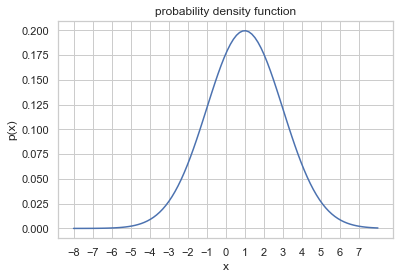

In [44]:
# mean (i.e. loc) = 1, scale (i.e. std) = 2.
rv = stats.norm(loc=1, scale=2)
x_vals = np.linspace(-8, 8, 100)
pdf=rv.pdf(x_vals)
plt.plot(x_vals, pdf)
plt.title('probability density function')
plt.xticks(np.arange(-8, 8, step=1))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

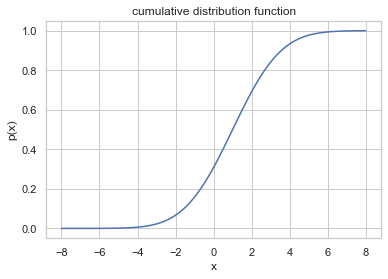

In [45]:
cdf = rv.cdf(x_vals)
plt.plot(x_vals, cdf)
plt.title('cumulative distribution function')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

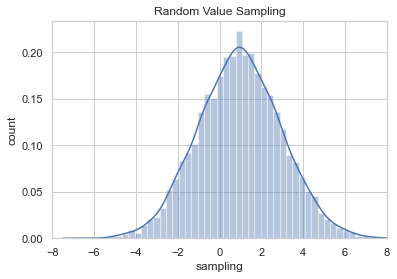

In [46]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title('Random Value Sampling')
plt.xlabel('sampling')
plt.ylabel('count')
plt.xlim(-8, 8)
plt.show()

stats.gamma(shape, loc=, scale=) is gamma continuous random variable. where shape is loc is mean and scale is standard deviation. 

gamma.pdf(x, shape, scale) $=f(x, shape, scale) = \frac{{x}^{shape-1}exp(-x/scale)}{{scale}^{shape} \Gamma (shape)}$ 


In [47]:
stats.gamma(5).rvs(1)

array([4.76379114])

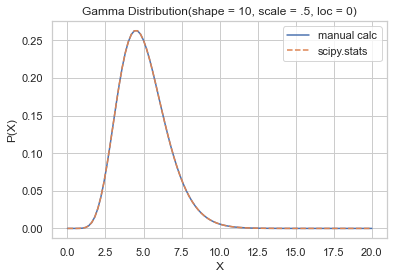

In [48]:
shape = 10
scale = .5
x = np.linspace(0, 20, 101)
y = x ** (shape - 1) * np.exp(-x / scale) / (scale ** shape * gamma(shape))
plt.plot(x, y)

loc = 0
y1 = stats.gamma(shape, loc=loc, scale=scale).pdf(x)
plt.plot(x, y1, '--')

plt.legend(['manual calc','scipy.stats'])
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(shape = 10, scale = .5, loc = 0)')
plt.show()

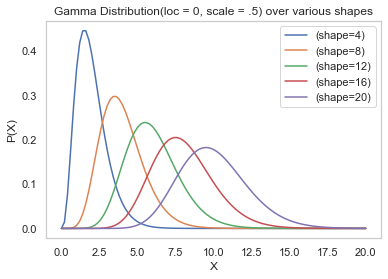

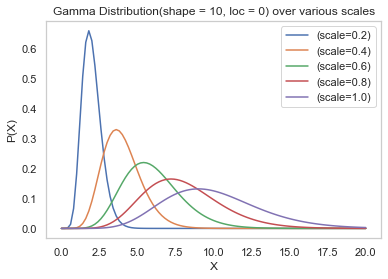

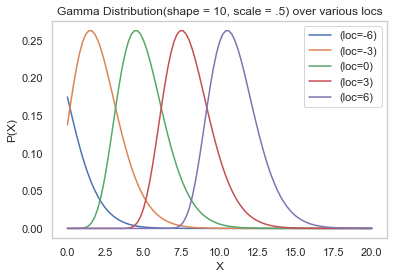

In [49]:

# As shape increases, gamma distribution gets wider.
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(loc = 0, scale = .5) over various shapes')
plt.grid()

for shape in np.arange(4, 24, 4):
    plt.plot(x, stats.gamma(shape, loc, scale).pdf(x), label='(shape=' + str(shape) + ')')
    
plt.legend()
plt.show()

# As scale increases, gamma distribution gets wider more extremely.
shape = 10

plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(shape = 10, loc = 0) over various scales')
plt.grid()

for scale in (np.arange(2, 12, 2) / 10):
    plt.plot(x, stats.gamma(shape, loc, scale).pdf(x), label='(scale=' + str(scale) + ')')
    
plt.legend()
plt.show()

# As loc increases, the position of gamma distribution shifts to right.
shape = 10
scale = .5

plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(shape = 10, scale = .5) over various locs')
plt.grid()

for loc in (np.arange(5) * 3 - 6):
    plt.plot(x, stats.gamma(shape, loc, scale).pdf(x), label='(loc=' + str(loc) + ')')
    
plt.legend()
plt.show()


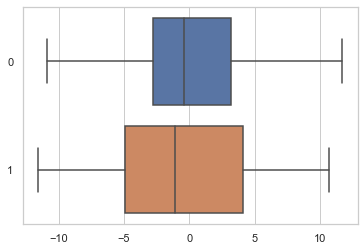

In [50]:
# Two gamma distribution concatenated together.
# one is positive gamma and the other is negative gamma.
box_data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                            -1*stats.gamma(5).rvs(50)])
sns.boxplot(data=[box_data1, box_data2], orient='h')
plt.show()

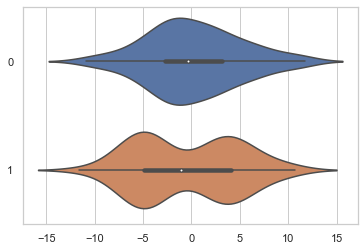

In [51]:
# violinplot shows the density (distribution of both the positive and
# negative gammas) while a boxplot does not show that.
# 'inner' is the type of plot that shows inside of violinplot.
# default as boxplot. 
sns.violinplot(data=[box_data1, box_data2], orient='h', inner='box')
plt.show()

### VIOLIN PLOT

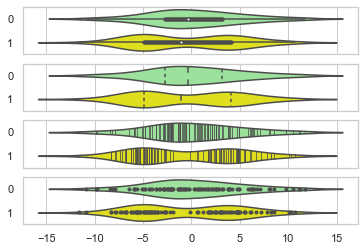

In [52]:
# 'inner' plot can be changed. As following figure shows,
# Inside of violinplot, 
#   boxplot shows {min, max}: unrecognizable and {Q1, median, Q2}: visible.
#   quartile shows only Q1, median, and Q2.
#   stick shows density of data points as lines.
#   point shows density of data points as points.

fig, (axis1, axis2, axis3, axis4) = plt.subplots(4,1,sharey=True)
colors_viol=['lightgreen', 'yellow']

sns.violinplot(data=[box_data1, box_data2], orient='h', 
               ax=axis1, palette=colors_viol)
sns.violinplot(data=[box_data1, box_data2], orient='h', 
               inner='quartile', ax=axis2, palette=colors_viol)
sns.violinplot(data=[box_data1, box_data2], orient='h', 
               inner='stick', ax=axis3, palette=colors_viol)
sns.violinplot(data=[box_data1, box_data2], orient='h', 
               inner='point', ax=axis4, palette=colors_viol)
plt.show()

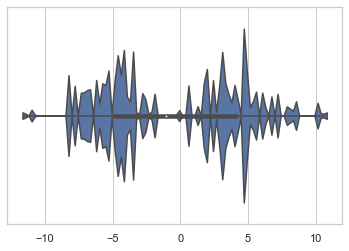

In [53]:
# Apply a small bandwidth for making sensitive
sns.violinplot(box_data2, bw=0.01)
plt.show()

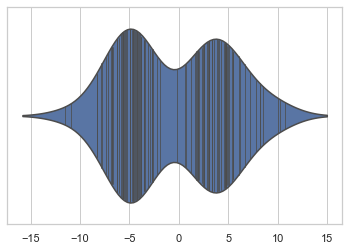

In [54]:
# Apply inner stick like a rugplot to violinplot.
sns.violinplot(box_data2, inner='stick')
plt.show()

### REGRESSION PLOT

$y=β_0+β_1x_1+β_2x_2+...+β_nx_n $

$y$ is the response

$β_0$ is the intercept

$β_1$ is the coefficient for  $x_1$  (1st feature)

...

$β_n$ is the coefficient for  $x_n$  (nth feature)


These values are "learned" during the model fitting step using the "least squares" criterion
Then, the fitted model can be used to make predictions

In [55]:
# Get tips dataframe.
tips = sns.load_dataset('tips')

In [56]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


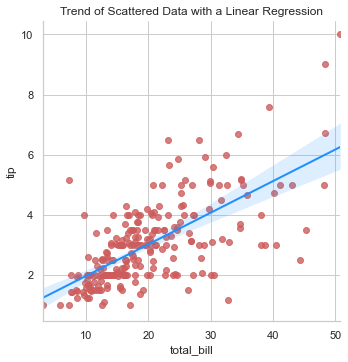

In [57]:
# regression plot.
sns.lmplot('total_bill', 'tip', tips, 
           scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':2,'color':'dodgerblue'})
plt.title('Trend of Scattered Data with a Linear Regression')
plt.show()

In [176]:
X = tips['total_bill']
y = tips['tip']

# train-test data split.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=101)

# fit using reshape the data form like 
# [[x1], [x2], [x3], ... , [xn]] for
# polynominal regression analysis. 
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# linear regression train model.
lm = LinearRegression()
lm.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# print the intercept
print('intercept:',lm.intercept_)


intercept: 0.7576649046184301


In [71]:

# coefficient for total_bill
coeff_df = pd.DataFrame(lm.coef_, ['total_bill'], columns=['Coefficient'])
coeff_df
# 
# It means that tip $ 0.116 increases as unit $1 increases in total_bill.


,Coefficient
total_bill,0.11614


$y=β_0+β_1x_1+β_2x_2+...+β_nx_n $

$y=0.757+0.116x_1$; there is only one independent variable of total_bill.

the others are zeros.

In [187]:
# print R^2 values over 
print('R^2:', lm.score(X_test, y_test))


R^2: 0.2762807239407852


The linear model regressing Y(tip) on X(total_bill)
has 27.63% of the variability.

In [188]:
tips.head(2)


,total_bill,tip,sex,smoker,day,time,size,tip_pect,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,False
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,False


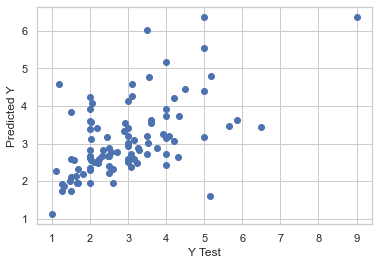

RMSE for Linear Regression: 1.1257974308379615


In [190]:
predictions = lm.predict(X_test)
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

from sklearn import metrics
print('RMSE for Linear Regression:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

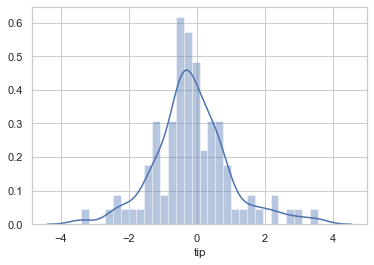

MAE: 0.8282548364382598
MSE: 1.2674198552813547
RMSE: 1.1257974308379615


In [191]:
# Check if your model is a good fit. 
# using distplot for the residuals.
sns.distplot((y_test-predictions), bins=30)
plt.show()


print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [159]:
totalBill = float(input("Type your total_bill for tip prediction: "))

print('Your linear model predicts the tip:',lm.predict([[totalBill]]), 'from your total bill ${}'.format(totalBill))

Type your total_bill for tip prediction: 55
Your linear model predicts the tip: [7.14534353] from your total bill $55.0


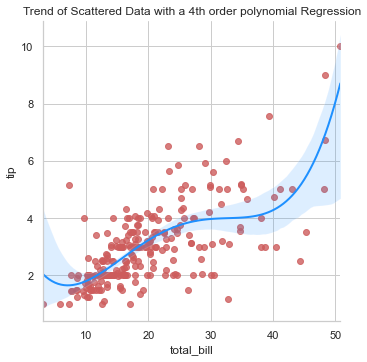

In [165]:
# regression plot with passing 4th order polynomial equation.
sns.lmplot('total_bill', 'tip', tips, order=4,
           scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':2,'color':'dodgerblue'})
plt.title('Trend of Scattered Data with a 4th order polynomial Regression')
plt.show()

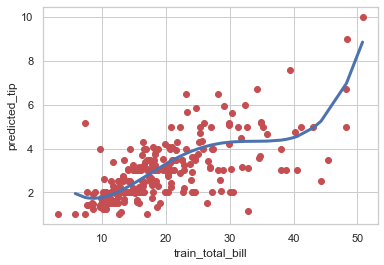

In [161]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#X = scale.fit_transform(tips['total_bill'].values.reshape())

# train-test data split.
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                    test_size=0.4, 
#                                                    random_state=101)

poly_pred=PolynomialFeatures(degree=4)
# Collect predicted values with respect to X_train
X_poly= poly_pred.fit_transform(X_train)

# Linear Regression fit on 4th order regression.
Lmodel = LinearRegression()
Lmodel.fit(X_poly, y_train)

y_pred = Lmodel.predict(X_poly)

plt.scatter(tips['total_bill'], tips['tip'], color='r')

predictedTip=pd.DataFrame({'train_total_bill': pd.Series(map(lambda x: x[0], X_train)), 
                 'predicted_tip': y_pred })
sns.lineplot(x="train_total_bill", y="predicted_tip", data=predictedTip, color='b', lw=3)

plt.show()

In [164]:
print('R^2:', Lmodel.score(X_poly, y_train))

R^2: 0.6052569507091332


In [162]:
fouth_tip = Lmodel.predict( poly_pred.fit_transform(np.array([ [totalBill] ])))
print('Your linear model predicts the tip:',fouth_tip, 'from your total bill ${}'.format(totalBill))

Your linear model predicts the tip: [13.83819095] from your total bill $55.0


Compared to R^2 of the linear model (27.6%), R^2 of the polynomial is better fit. However, we need to check if it's overfitting. 
The polynomial model regressing Y(tip) on X(total_bill)
has 60.5% of the variability.

In [192]:
# Add new column of tip percentage ('tip_pect') to the dataframe tips.
tips['tip_pect']=(tips['tip']/tips['total_bill'])*100
tips.head(3)


,total_bill,tip,sex,smoker,day,time,size,tip_pect,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,False
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,False
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,False


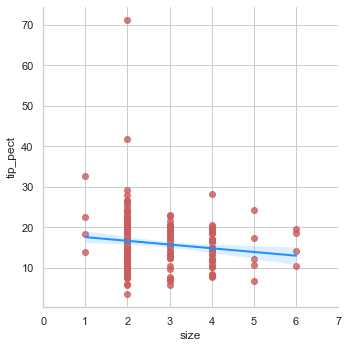

In [193]:
sns.lmplot(data=tips, x='size', y='tip_pect',
          scatter_kws={'marker':'o','color':'indianred'},line_kws={'linewidth':2,'color':'dodgerblue'})
plt.xlim(0,7)
plt.show()

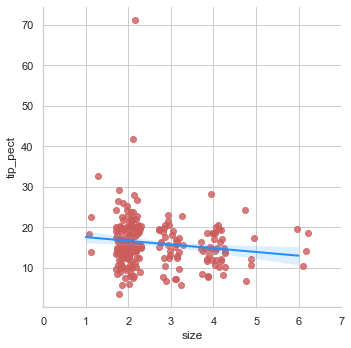

In [194]:
# Make x-axis ('size') distribution wider using x_jitter.
sns.lmplot(data=tips, x='size', y='tip_pect', x_jitter=0.3,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':2,'color':'dodgerblue'})
plt.xlim(0,7)
plt.show()

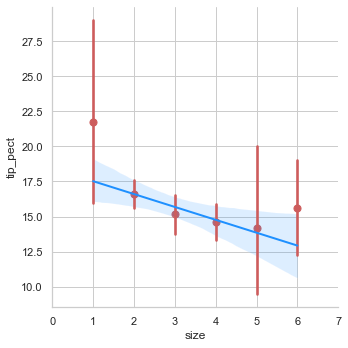

In [195]:
# Simplify the tendency using x_estimator be mean. 
sns.lmplot(data=tips, x='size', y='tip_pect', x_estimator=np.mean,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':2,'color':'dodgerblue'})
plt.xlim(0,7)
plt.show()

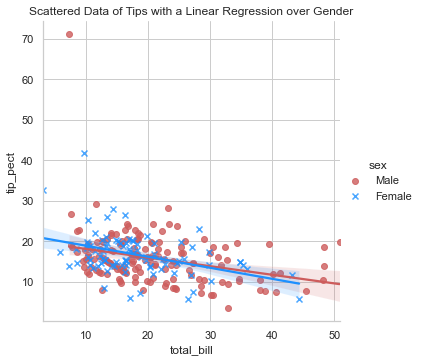

In [196]:
sns.lmplot(data=tips, x='total_bill', y='tip_pect',hue='sex',
           markers=['o', 'x'], palette=['indianred','dodgerblue'])
plt.title('Scattered Data of Tips with a Linear Regression over Gender')
plt.show()

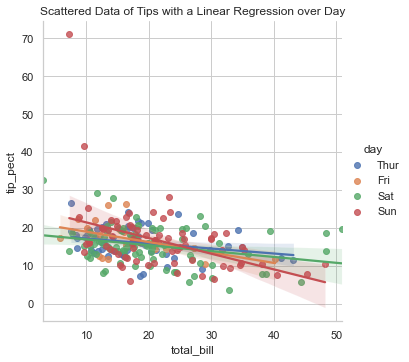

In [114]:
sns.lmplot(data=tips, x='total_bill', y='tip_pect',hue='day')
plt.title('Scattered Data of Tips with a Linear Regression over Day')
plt.show()

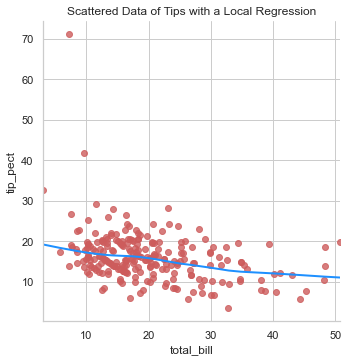

In [115]:
# apply local regression.
sns.lmplot(data=tips, x='total_bill', y='tip_pect',lowess=True, 
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':2,'color':'dodgerblue'})
plt.title('Scattered Data of Tips with a Local Regression')
plt.show()

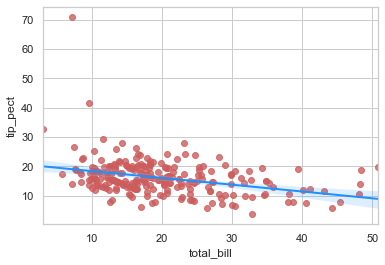

In [116]:
# apply regression.
sns.regplot(data=tips, x='total_bill', y='tip_pect', 
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':2,'color':'dodgerblue'})

plt.show()

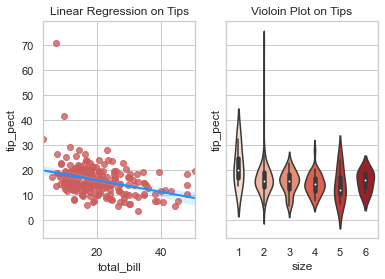

In [117]:
fig, (axis1, axis2)=plt.subplots(1,2,sharey=True)
sns.regplot(data=tips, x='total_bill', y='tip_pect', 
            scatter_kws={'marker':'o','color':'indianred'},
            line_kws={'linewidth':2,'color':'dodgerblue'},
            ax=axis1)
axis1.set_title('Linear Regression on Tips')
sns.violinplot(x=tips['size'], y=tips['tip_pect'], palette='Reds',ax=axis2)
axis2.set_title('Violoin Plot on Tips')
plt.show()

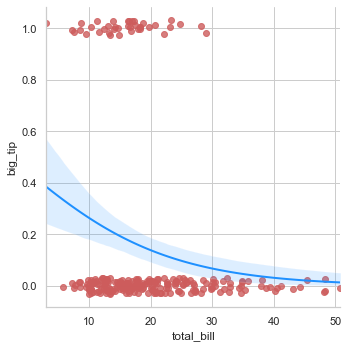

In [118]:
# logistic regression (classification)
tips["big_tip"] = tips.tip_pect > 20
g = sns.lmplot(x="total_bill", y="big_tip", 
               data=tips, logistic=True, y_jitter=.03,
               scatter_kws={'marker':'o','color':'indianred'},
               line_kws={'linewidth':2,'color':'dodgerblue'})


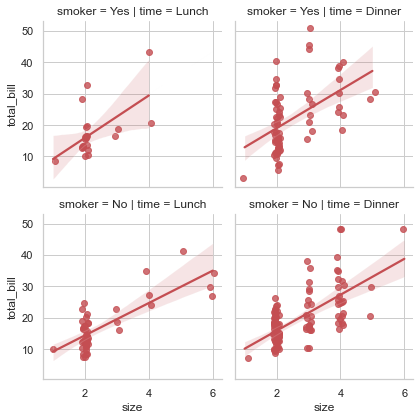

In [119]:
# mupti-plots.
g = sns.FacetGrid(tips, row="smoker", col="time")
g = g.map(sns.regplot, "size", "total_bill", color="r", x_jitter=.1)
plt.show()

### HEAT MAP

In [120]:
# Load flights dataframe.
flight_df=sns.load_dataset('flights')
flight_df.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [121]:
# Reshape it as index='month', columns='year', values='passengers'
flight_df=flight_df.pivot(index='month', columns='year', values='passengers')
flight_df.head(3)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419


In [122]:
# Check if there is a null in the data.
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 12 entries, January to December
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1949    12 non-null     int64
 1   1950    12 non-null     int64
 2   1951    12 non-null     int64
 3   1952    12 non-null     int64
 4   1953    12 non-null     int64
 5   1954    12 non-null     int64
 6   1955    12 non-null     int64
 7   1956    12 non-null     int64
 8   1957    12 non-null     int64
 9   1958    12 non-null     int64
 10  1959    12 non-null     int64
 11  1960    12 non-null     int64
dtypes: int64(12)
memory usage: 1.5 KB


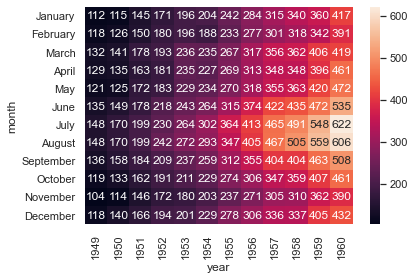

In [123]:
# apply annotation (annot) for each cell indicates number of passengers
sns.heatmap(data=flight_df, annot=True, fmt='d')
plt.show()

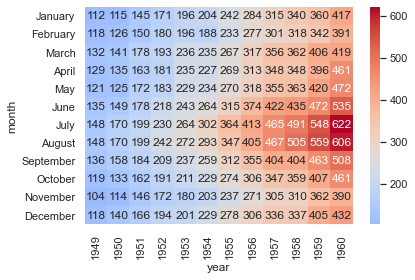

In [124]:
# apply color scheme centered at Jan. 1955 of the data.
midpoint = (flight_df.values.max() - flight_df.values.min()) / 2
sns.heatmap(data=flight_df, center=midpoint, # or center=flight_df.loc['January',1955], 
            annot=True, fmt='d', cmap='coolwarm')
plt.show()

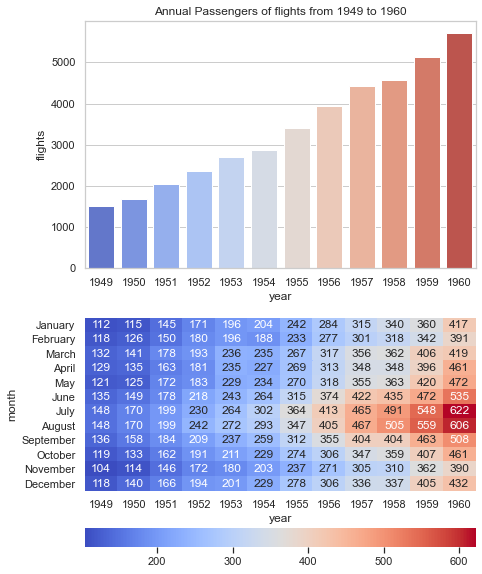

In [125]:
# subplots 2 rows and 1 column.
fig, (axis1, axis2) = plt.subplots(2,1, figsize=(7, 10))
sns.set()
# since the columns are years, each column sums all the values under each column.
yearly_flights=pd.DataFrame(flight_df.sum(), columns=['flights'])
yearly_flights_reindexed=yearly_flights.reset_index()

sns.barplot(data=yearly_flights_reindexed, x='year', y='flights', 
            ax=axis1, palette='coolwarm')
#axis1.set_title('barplot')

sns.heatmap(flight_df, ax=axis2,annot=True,fmt='d',cmap='coolwarm',
           cbar_kws={'orientation':'horizontal'})

axis1.set_title('Annual Passengers of flights from 1949 to 1960')
plt.show()


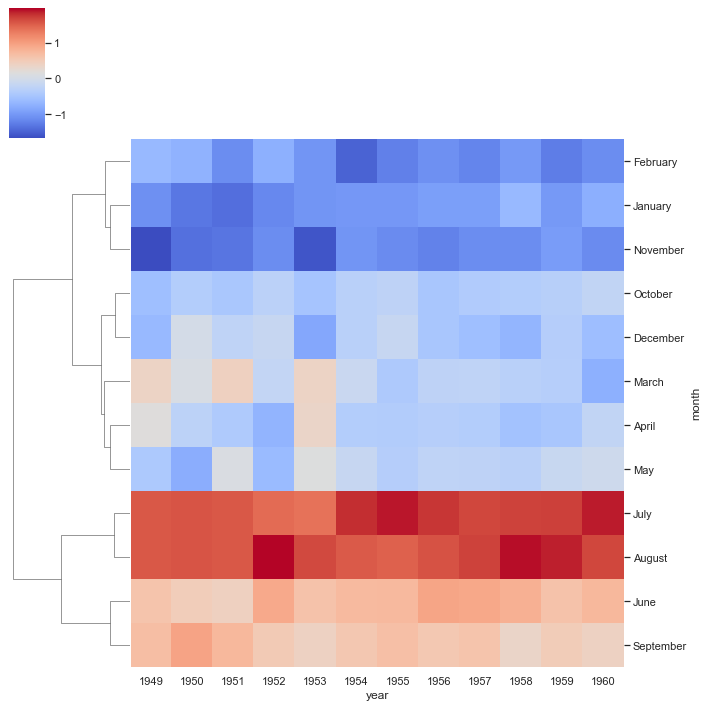

In [126]:
# To find the most relevant months (index) in terms
# of number of passengers, turn column cluster off and
# Applying z-score=1 means z=(x-mean)/std for each column
# which helps how far a data point from the mean.

sns.clustermap(data=flight_df, col_cluster=False, 
              z_score=1, cmap='coolwarm')

### Practice for Data Visualization

DATASET: https://drive.google.com/file/d/1NTI8YU97JK81XqwwMn2EDJaEpIsJiyp8/view?usp=sharing

In [127]:
path = '/Users/Jae/Google_Drive_jae0325/DATA_SCIENCE/Medium_examples/StudentsPerformance.csv'
students=pd.read_csv(path)
students.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [128]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [129]:
# rename a single (or partial) column(s) 
students.rename(columns={'math score':'math_score',
                         'reading score':'reading_score',
                         'writing score':'writing_score' }, inplace=True)
students.head(0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score


In [130]:
formula = "math_score ~ reading_score + writing_score"
analysis = ols(formula=formula, data=students).fit()
analysis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):          2.25e-243
Time:                        18:08:00   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5241      1.328      5.665      0.000       4.918      10.131
reading_score     0.6013      0.063      9.538      0.000       0.478       0.725
writing_score     0.2494      0.061      4.118      0.000       0.131       0.368
==============================================================================
Omnibus:                       10.227   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.801
Skew:                           0.006   Prob(JB):                       0.0334
Kurtosis:                       2.596   Cond. No.                         481.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
students['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

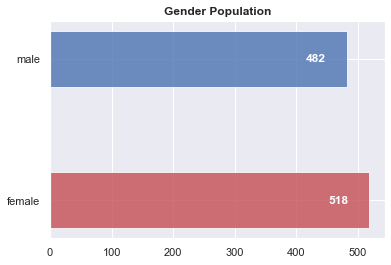

In [132]:
#sns.barplot(x=data['gender'].value_counts().index, y=data['gender'].value_counts().values)
gender_x=students['gender'].value_counts().index 
gender_y=students['gender'].value_counts().values
width = 0.4
plt.barh(gender_x, gender_y, width, color=['r', 'b'], alpha=0.8)
plt.title('Gender Population', fontweight="bold")
#plt.ylabel('Population')
for y_loc, x_loc in enumerate(gender_y):
    plt.text(x_loc-50, y_loc, str(x_loc), color='white', fontweight='bold', ha='center', va='center')
plt.show()

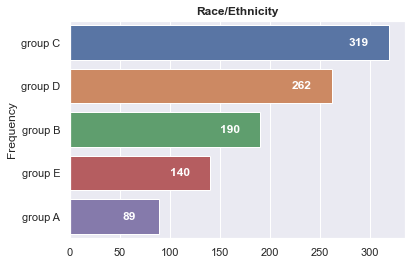

In [133]:
#plt.figure(figsize=(7,7))
race_x=students['race/ethnicity'].value_counts().index
race_y=students['race/ethnicity'].value_counts().values
for y_loc, x_loc in enumerate(race_y):
    plt.text(x_loc-30, y_loc, str(x_loc), color='white', fontweight='bold', ha='center', va='center')
sns.barplot(race_y, race_x)
#plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Race/Ethnicity', fontweight="bold")
plt.show()

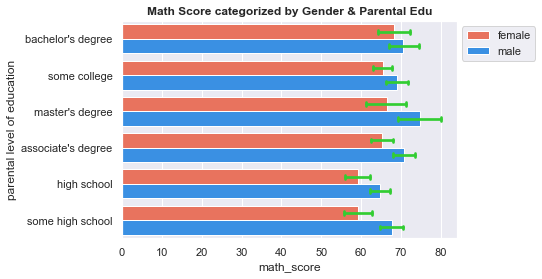

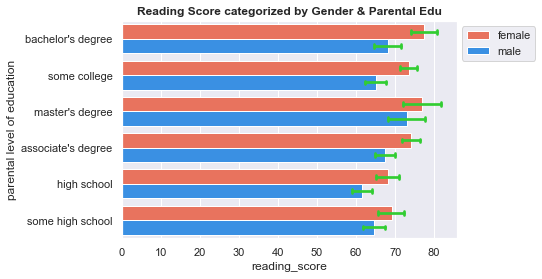

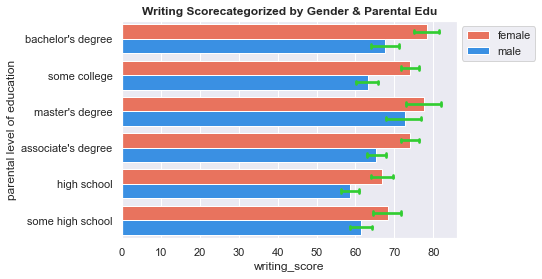

In [134]:
plt.subplot()

#sns.set(color_codes=True)

ms_bar = sns.barplot(data=students, errcolor='limegreen',
                     y="parental level of education", x="math_score", 
                     hue="gender", palette=['tomato', 'dodgerblue'], capsize=.1)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.title("Math Score categorized by Gender & Parental Edu", fontweight="bold")
plt.show()

rs_bar = sns.barplot(data=students, errcolor='limegreen',
                    y="parental level of education", x="reading_score",
                    hue = "gender", palette=['tomato', 'dodgerblue'], capsize=.1)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.title("Reading Score categorized by Gender & Parental Edu", fontweight="bold")
plt.show()

ws_bar = sns.barplot(data=students, errcolor='limegreen',
                     y="parental level of education", x="writing_score", 
                     hue="gender", palette=['tomato', 'dodgerblue'], capsize=.1)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.title("Writing Scorecategorized by Gender & Parental Edu", fontweight="bold")
plt.show()

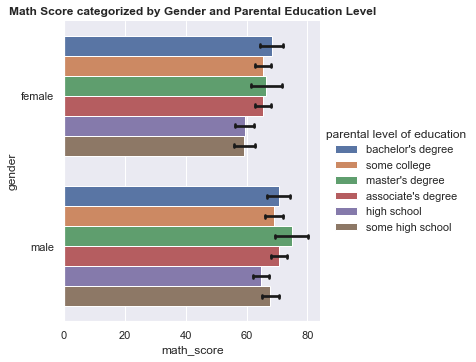

In [135]:
sns.catplot(data=students, y="gender", x="math_score", 
                 hue="parental level of education",
                 kind="bar", errcolor='k', capsize=.02)
plt.xticks(rotation=0)
#plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.title('Math Score categorized by Gender and Parental Education Level', fontweight="bold")
plt.show()

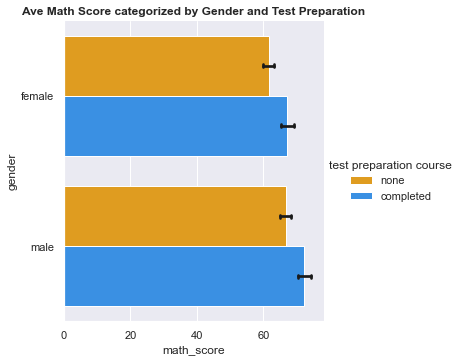

In [136]:
sns.catplot(data=students, y="gender", x="math_score", palette=['orange', 'dodgerblue'],
            kind="bar", hue="test preparation course",
            errcolor='k', capsize=.02)
plt.title('Ave Math Score categorized by Gender and Test Preparation', fontweight="bold")
plt.show()

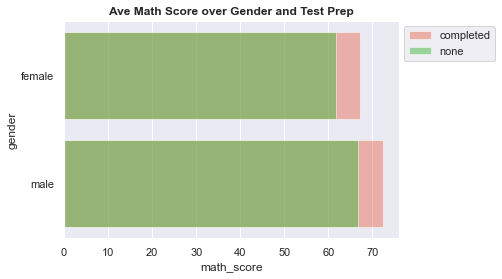

In [137]:
# Condition of students who completed test prep course.
cond_yes_test = students['test preparation course']=='completed'
# ci=None for error bar off.
sns.barplot(data=students[cond_yes_test], 
            x="math_score", y="gender", ci=None,
            alpha=0.5,color='tomato',label='completed')

cond_no_test = students['test preparation course']=='none'
sns.barplot(data=students[cond_no_test],
            x="math_score", y="gender", ci=None,
            alpha=0.5,color='limegreen',label='none')

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)
plt.xlabel('math_score')
plt.ylabel('gender')
plt.title("Ave Math Score over Gender and Test Prep", fontweight="bold")
plt.show()

/Users/Jae/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  del sys.path[0]


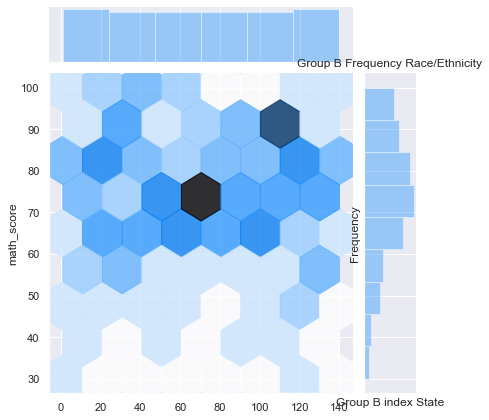

In [138]:
# kind='hex' shows the density clear in the group E students' math score. 
# x-axis indicates each individual student and y-axis indicates math score.
# the side bar of the histogram follows a normal distribution.
groupE=students['race/ethnicity']=='group E'
groupE_length=students[groupE]['math_score'].count()
sns.jointplot(x=np.arange(1,groupE_length+1),
              y=students[groupE]['math_score'],
              color='dodgerblue',alpha=0.8, kind='hex')
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Frequency Race/Ethnicity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

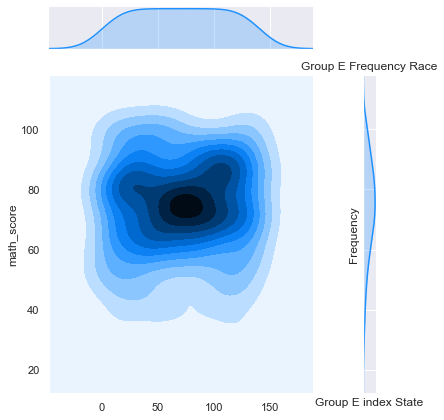

In [139]:
sns.jointplot(x=np.arange(1,groupE_length+1),
              y=students[groupE]['math_score'],
              color='dodgerblue',space=0,kind='kde')
plt.xlabel('Group E index State')
plt.ylabel('Frequency')
plt.title('Group E Frequency Race')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

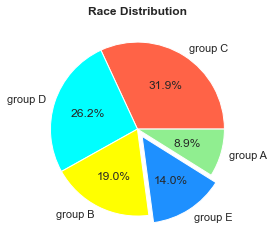

In [140]:
# Race Distribution.
labels=students['race/ethnicity'].value_counts().index
colors=['tomato','cyan','yellow','dodgerblue','lightgreen']
explode=[0,0,0,0.1,0]
values=students['race/ethnicity'].value_counts().values

plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race Distribution',fontweight="bold")
plt.show()



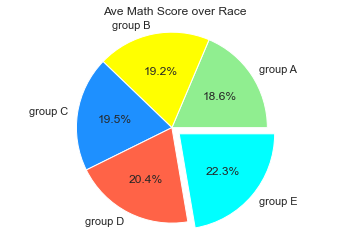

[['group A' 'group B' 'group C' 'group D' 'group E']
 ['61.62921348314607' '63.45263157894737' '64.46394984326018'
  '67.36259541984732' '73.82142857142857']]


In [141]:
# Ave Math Score over Race.
races = ['group A', 'group B', 'group C', 'group D','group E']
mean_math = students.groupby('race/ethnicity')['math_score'].mean().values
colors_math = ['lightgreen', 'yellow', 'dodgerblue', 'tomato', 'cyan']
explodes_math = [0,0,0,0,0.1]

plt.pie(mean_math,labels=races,colors=colors_math,explode=explodes_math,
        autopct='%1.1f%%', shadow=False)
plt.title('Ave Math Score over Race')
plt.axis('equal')
plt.show()
print(np.vstack((races,mean_math)))

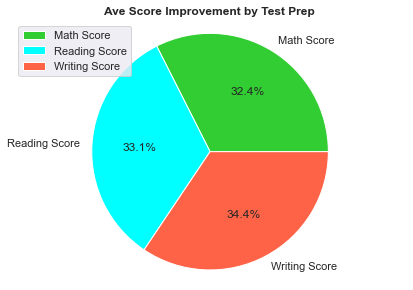

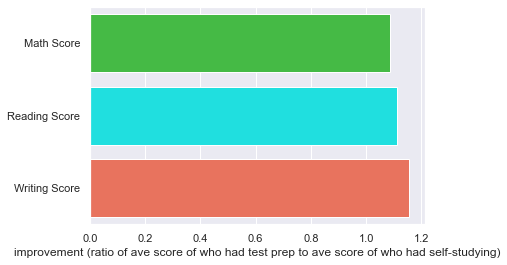

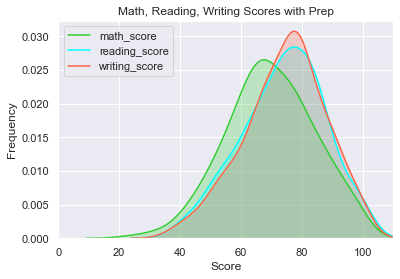

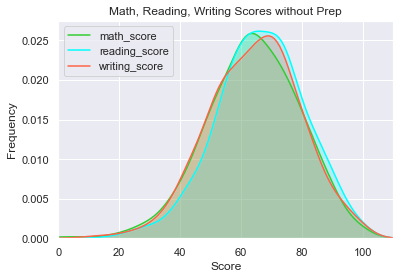

In [142]:
# Show how test prep increased the students' performances over all subjects
subjects=['Math Score', 'Reading Score', 'Writing Score']
colors_sub=['limegreen', 'cyan', 'tomato']
explodes_sub=[0,0,0]
math_improv = students[cond_yes_test]['math_score'].mean()/students[cond_no_test]['math_score'].mean()
reading_improv = students[cond_yes_test]['reading_score'].mean()/students[cond_no_test]['reading_score'].mean()
writing_improv = students[cond_yes_test]['writing_score'].mean()/students[cond_no_test]['writing_score'].mean()
mean_sub=[math_improv, 
        reading_improv, 
        writing_improv]

plt.pie(mean_sub,labels=subjects,colors=colors_sub,explode=explodes_sub,
        autopct='%1.1f%%',shadow=False)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'] , loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.title("Ave Score Improvement by Test Prep", fontweight="bold")
plt.show()

sns.barplot(x=[math_improv, reading_improv, writing_improv], y=subjects, palette=colors_sub)
plt.xlabel('improvement (ratio of ave score of who had test prep to ave score of who had self-studying)')
#plt.ylabel('')
#plt.title("Ave Score Improvement by Test Prep", fontweight="bold")
plt.show()

plt.xlim(0,110)
sns.kdeplot(students[cond_yes_test]['math_score'],shade=True,color=colors_sub[0], legend='math with prep')
sns.kdeplot(students[cond_yes_test]['reading_score'],shade=True,color=colors_sub[1], legend='reading with prep')
sns.kdeplot(students[cond_yes_test]['writing_score'],shade=True,color=colors_sub[2], legend='writing with prep')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Math, Reading, Writing Scores with Prep')
plt.show()

plt.xlim(0,110)
sns.kdeplot(students[cond_no_test]['math_score'],shade=True,color=colors_sub[0])
sns.kdeplot(students[cond_no_test]['reading_score'],shade=True,color=colors_sub[1])
sns.kdeplot(students[cond_no_test]['writing_score'],shade=True,color=colors_sub[2])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Math, Reading, Writing Scores without Prep')
plt.show()

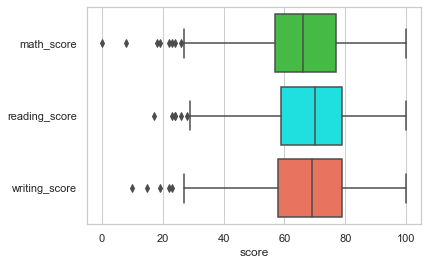

In [198]:
# Students' score over subjects.
sns.set(style='whitegrid')
sns.boxplot(x = [students['math_score'], students['reading_score'], students['writing_score']],
            y = list(students.columns[-3:]),
            palette=colors_sub)
plt.xlabel('score')
plt.show()

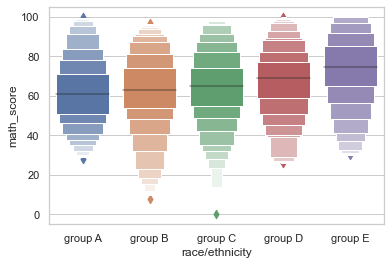

In [199]:
races_lst=sorted(list(students['race/ethnicity'].unique()))

sns.boxenplot(data=students,
              x='race/ethnicity', y='math_score',
              scale='linear', order=races_lst)
plt.show()

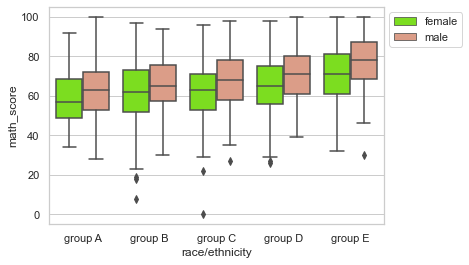

In [200]:
sns.boxplot(x=students['race/ethnicity'],
            y=students['math_score'],
            hue=students['gender'],
            palette=['lawngreen','darksalmon'],
            order=races_lst, dodge=True)
plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)
plt.show()

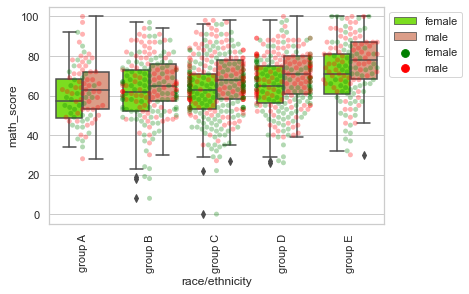

In [201]:
# Showing boxplot and swamplot offsets the cons of
# its simplicity for distribution. 
sns.boxplot(x=students['race/ethnicity'],
            y=students['math_score'],
            hue=students['gender'],
            palette=['lawngreen','darksalmon'],
            order=races_lst, dodge=True)
plt.xticks(rotation=90)

sns.swarmplot(x=students['race/ethnicity'],
              y=students['math_score'],
              hue=students['gender'], alpha=0.3,
              palette=['green','red'],
              order=races_lst
              )
plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)
plt.show()

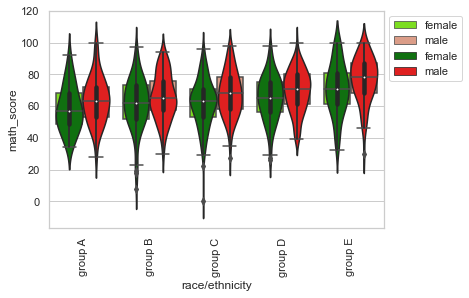

In [202]:
# Showing boxplot and violinplot.
sns.boxplot(x=students['race/ethnicity'],
            y=students['math_score'],
            hue=students['gender'],
            palette=['lawngreen','darksalmon'],
            order=races_lst, dodge=True)
plt.xticks(rotation=90)

sns.violinplot(x=students['race/ethnicity'],
              y=students['math_score'],
              hue=students['gender'], alpha=0.3,
              palette=['green','red'],
              order=races_lst
              )
plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)
plt.show()

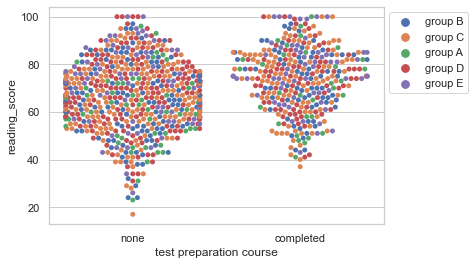

In [203]:
# Swarm plots accurately shows test prep helps 
# students' performance on reading.
sns.swarmplot(x=students['test preparation course'],
              y=students['reading_score'],
              hue=students['race/ethnicity'])

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)

plt.show()

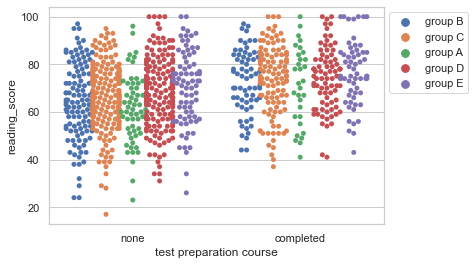

In [204]:
# It can be shown by grouping them. 
sns.swarmplot(x=students['test preparation course'],
              y=students['reading_score'],
              hue=students['race/ethnicity'],
              dodge=True)

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)

plt.show()

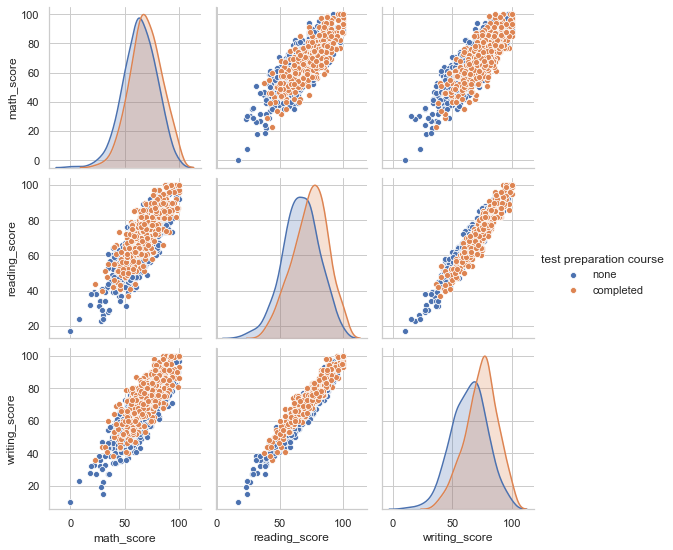

In [205]:
# pair plot for how test prep affected the scores.
sns.pairplot(data=students,diag_kind='kde',
            hue='test preparation course')
plt.show()

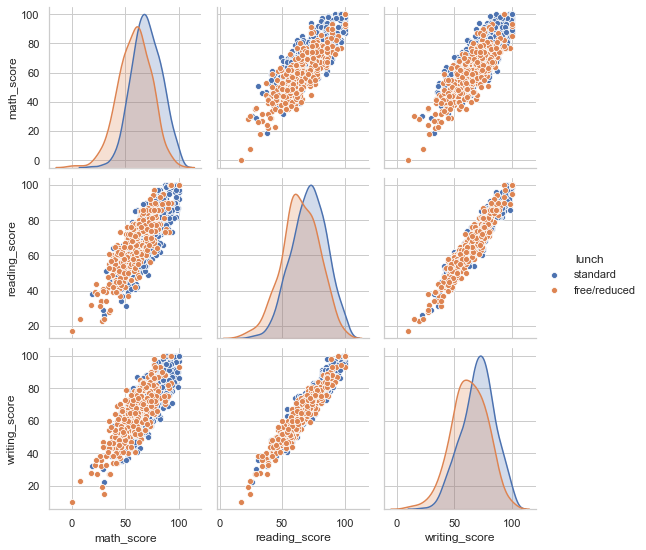

In [206]:
# Pairplot for how luch affected the scores. 
sns.pairplot(data=students,diag_kind='kde',
            hue='lunch')
plt.show()

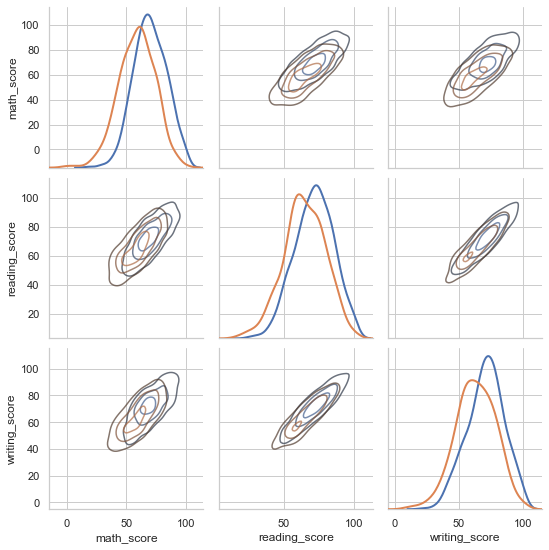

In [207]:
g=sns.PairGrid(students, hue='lunch', diag_sharey=False)
g.map_diag(sns.kdeplot, lw=2)
#g.map_upper(plt.scatter)
#g.map_lower(sb.kdeplot, cmap = "Blues_d")
g.map_offdiag(sns.kdeplot, n_levels=3, alpha=0.7)
plt.show()

In [208]:

students.head(3)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


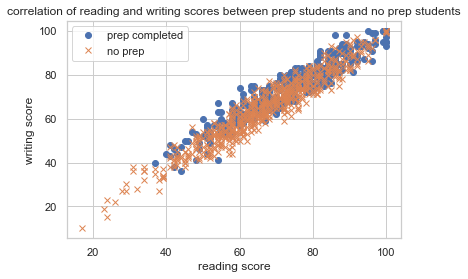

In [209]:
test_prep_read = students[students['test preparation course']=='completed']['reading_score']
test_prep_write = students[students['test preparation course']=='completed']['writing_score']
plt.plot(test_prep_read, test_prep_write, 'o', label='prep completed')

no_prep_read = students[students['test preparation course']=='none']['reading_score']
no_prep_write = students[students['test preparation course']=='none']['writing_score']
plt.plot(no_prep_read, no_prep_write, 'x', label='no prep')
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.title('correlation of reading and writing scores between prep students and no prep students')
plt.legend()
plt.show()

In [210]:
## Test Prep linear regression 
line_fitter_test_prep = LinearRegression()
# Reshape the values in test_prep_read from (length of the data, 1).
# This is shaping the data such as [[x1], [x2], [x3], ... , [xn]] for
# polynominal regression analysis. 
line_fitter_test_prep.fit(test_prep_read.values.reshape(-1,1), test_prep_write)

## No Prep linear regression
line_fitter_no_prep = LinearRegression()
line_fitter_no_prep.fit(no_prep_read.values.reshape(-1,1), no_prep_write)

## metric R^2
print('Test prep R^2:',line_fitter_test_prep.score(test_prep_read.values.reshape(-1,1), test_prep_write))
print('No prep R^2:', line_fitter_no_prep.score(no_prep_read.values.reshape(-1,1), no_prep_write))


Test prep R^2: 0.8964089850281043
No prep R^2: 0.9166704107138229


In [211]:
# Another way by using statsmodel. 
prep_X = sm.add_constant(test_prep_read.values.reshape(-1,1))
prep_result = sm.OLS(test_prep_write, prep_X).fit()
print('Test prep R^2:', prep_result.rsquared, prep_result.rsquared_adj)

no_prep_X = sm.add_constant(no_prep_read.values.reshape(-1,1))
no_prep_result = sm.OLS(no_prep_write, no_prep_X).fit()
print('Test prep R^2:', no_prep_result.rsquared, no_prep_result.rsquared_adj)

Test prep R^2: 0.8964089850281043 0.8961179990309922
Test prep R^2: 0.9166704107138229 0.9165402082305633


In [212]:
readingScore = float(input("Type your reading score for writing score prediction: "))


Type your reading score for writing score prediction: 75


In [213]:
print('Your reading score:', readingScore, '\n',
     'prediction of writing score if you completed test prep:', line_fitter_test_prep.predict([[readingScore]]), '\n',
     'prediction of writing score if you did NOT complete test prep:', line_fitter_no_prep.predict([[readingScore]]))


Your reading score: 75.0 
 prediction of writing score if you completed test prep: [75.44608091] 
 prediction of writing score if you did NOT complete test prep: [72.91025153]


In [214]:
prep_read_train, prep_read_test, prep_write_train, prep_write_test = train_test_split(
            test_prep_read, test_prep_write, 
            test_size=0.25, random_state=42)

no_prep_read_train, no_prep_read_test, no_prep_write_train, no_prep_write_test = train_test_split(
            no_prep_read, no_prep_write, 
            test_size=0.25, random_state=42)

In [215]:
prep_regressor = LinearRegression()
prep_regressor.fit(prep_read_train.values.reshape(-1,1), prep_write_train)

no_prep_regressor = LinearRegression()
no_prep_regressor.fit(no_prep_read_train.values.reshape(-1,1), no_prep_write_train)

LinearRegression()

In [216]:
print("The coefficient for {} is {}".format('prep writing score on reading', prep_regressor.coef_))

print()

print("The coefficient for {} is {}".format('prep writing score on reading', no_prep_regressor.coef_))

The coefficient for prep writing score on reading is [0.94242198]

The coefficient for prep writing score on reading is [0.98145421]


In [217]:
prep_intct = prep_regressor.intercept_
no_prep_intct = no_prep_regressor.intercept_
print("The intercept for prep model is {}".format(prep_intct))
print("The intercept for prep model is {}".format(no_prep_intct))

The intercept for prep model is 4.747826347427363
The intercept for prep model is -0.8061298552387228


In [218]:
print('R^2 for prep model:',
      prep_regressor.score(
          prep_read_test.values.reshape(-1,1), 
          prep_write_test) )
print('R^2 for no prep model:',
      no_prep_regressor.score(
          no_prep_read_test.values.reshape(-1,1), 
          no_prep_write_test) )

R^2 for prep model: 0.8700649898401921
R^2 for no prep model: 0.9102489669528244


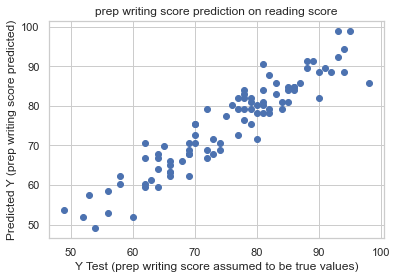

prep predicted writing score on reading score of 75.0: [75.42947454]


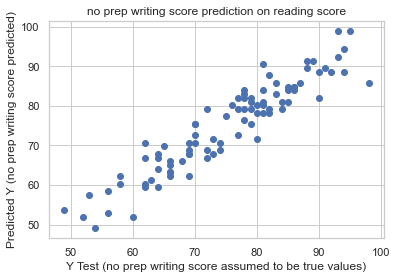

no prep predicted writing score on reading score of 75.0: [72.80293596]


In [219]:
prep_prediction = prep_regressor.predict(prep_read_test.values.reshape(-1,1))

no_pre_prediction = no_prep_regressor.predict(no_prep_read_test.values.reshape(-1,1))

plt.scatter(x = prep_write_test, y = prep_prediction)
plt.xlabel('Y Test (prep writing score assumed to be true values)')
plt.ylabel('Predicted Y (prep writing score predicted)')
plt.title('prep writing score prediction on reading score')
plt.show()

print('prep predicted writing score on reading score of {}:'.format(readingScore),
      prep_regressor.predict([[readingScore]]))

plt.scatter(x = prep_write_test, y = prep_prediction)
plt.xlabel('Y Test (no prep writing score assumed to be true values)')
plt.ylabel('Predicted Y (no prep writing score predicted)')
plt.title('no prep writing score prediction on reading score')
plt.show()
print('no prep predicted writing score on reading score of {}:'.format(readingScore),
      no_prep_regressor.predict([[readingScore]]))

In [220]:
# Errors
print('---------------prep model Errors---------------')
print('MAE:', metrics.mean_absolute_error(prep_write_test, prep_prediction))
print('MSE:', metrics.mean_squared_error(prep_write_test, prep_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(prep_write_test, prep_prediction)))
print()
print('---------------no prep model Errors---------------')
print('MAE:', metrics.mean_absolute_error(no_prep_write_test, no_pre_prediction))
print('MSE:', metrics.mean_squared_error(no_prep_write_test, no_pre_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(no_prep_write_test, no_pre_prediction)))

---------------prep model Errors---------------
MAE: 3.2554557869482084
MSE: 16.27795328699444
RMSE: 4.034594562901511

---------------no prep model Errors---------------
MAE: 3.540622432163948
MSE: 19.027509854609526
RMSE: 4.362053398871858
